In [1]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from spacy.lang.es.stop_words import STOP_WORDS as es_stopwords
from wordcloud import WordCloud

c:\Users\froro\OneDrive\Escritorio\UNAL\RNA\FinancIA\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Configigurations
path = Path().cwd().parent/"Dataset"

In [3]:
# Functions
def plots_world_cloud(df, title, figsize=(10, 10)):
    """This function is used to plot the world cloud"""
    text = " ".join(df)
    plt.figure(figsize=figsize)
    wordcloud = WordCloud(background_color="white", stopwords=es_stopwords).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [4]:
df_train = pd.read_csv(path/"train.csv")
df_test = pd.read_csv(path/"test.csv")

df_train["len"] = df_train.text.apply(len)
df_train["tag"] = "train"
df_test["len"] = df_test.text.apply(len)
df_test["tag"] = "test"
df_train = pd.concat([df_train, df_test], axis=0)

In [5]:
df_train.head()

id                                               text   
0  69737  Renfe afronta mañana un nuevo día de paros par...  \
1  71795       Presupuesto populista con cimientos frágiles   
2  77984  Biden no cree que la OPEP+ vaya a ayudar con l...   
3  82648  La deuda de las familias cae en 25.000 millone...   
4  97337  Bestinver: no hay "momento más inoportuno" par...   

                  target target_sentiment companies_sentiment   
0                  Renfe         negative            negative  \
1  Presupuesto populista         negative            negative   
2                  OPEP+         negative            negative   
3  deuda de las familias         positive            positive   
4              Bestinver         negative            negative   

  consumers_sentiment  len    tag  
0            negative   71  train  
1            negative   44  train  
2            negative   69  train  
3            positive   91  train  
4            negative   57  train

In [6]:
pd.get_dummies(df_train[["target_sentiment", "companies_sentiment", "consumers_sentiment"]], columns=["target_sentiment", "companies_sentiment", "consumers_sentiment"]).iloc[0].astype(int)

target_sentiment_negative        1
target_sentiment_neutral         0
target_sentiment_positive        0
target_sentiment_postive         0
companies_sentiment_negative     1
companies_sentiment_neutral      0
companies_sentiment_positive     0
companies_sentiment_positive     0
consumers_sentiment_negative     1
consumers_sentiment_neutral      0
consumers_sentiment_neutral?     0
consumers_sentiment_positive     0
consumers_sentiment_positive     0
Name: 0, dtype: int32

In [42]:
df_train.target_sentiment = df_train.target_sentiment.str.replace(" ","")
df_train.companies_sentiment = df_train.companies_sentiment.str.replace(" ","")
df_train.consumers_sentiment = df_train.consumers_sentiment.str.replace(" ","")
df_train.consumers_sentiment = df_train.consumers_sentiment.str.replace("neutral?", "neutral")

# Análisis exploratorio para el train


<Axes: xlabel='target_sentiment'>

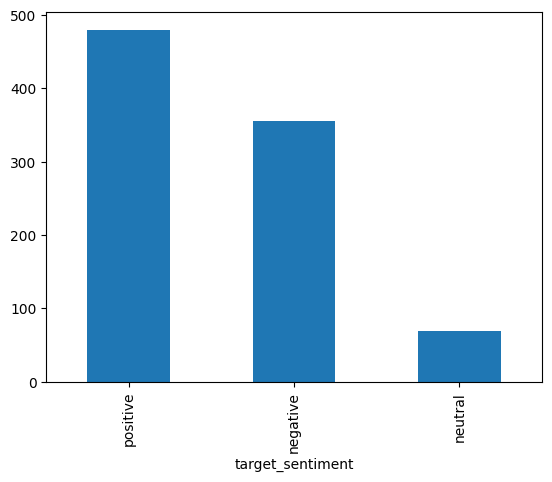

In [43]:
df_train.target_sentiment.value_counts().plot(kind="bar")

<Axes: title={'center': 'len'}, xlabel='target_sentiment'>

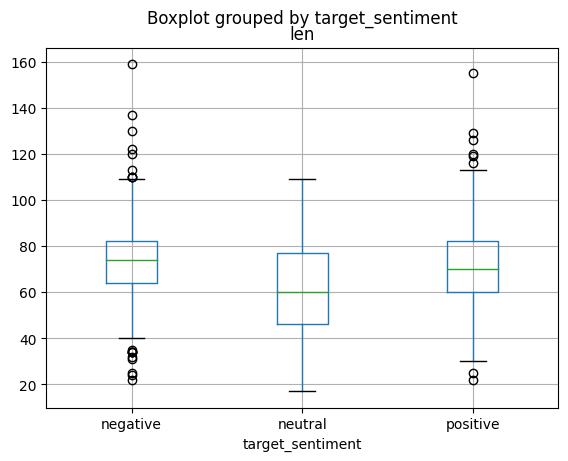

In [44]:
df_train.boxplot(column="len", by="target_sentiment")

In [45]:
df_train.groupby("target_sentiment").len.describe()

count       mean        std   min    25%   50%   75%    max
target_sentiment                                                             
negative          356.0  72.870787  17.779404  22.0  63.75  74.0  82.0  159.0
neutral            69.0  61.797101  21.466513  17.0  46.00  60.0  77.0  109.0
positive          480.0  71.352083  17.458779  22.0  60.00  70.0  82.0  155.0

<Axes: xlabel='companies_sentiment'>

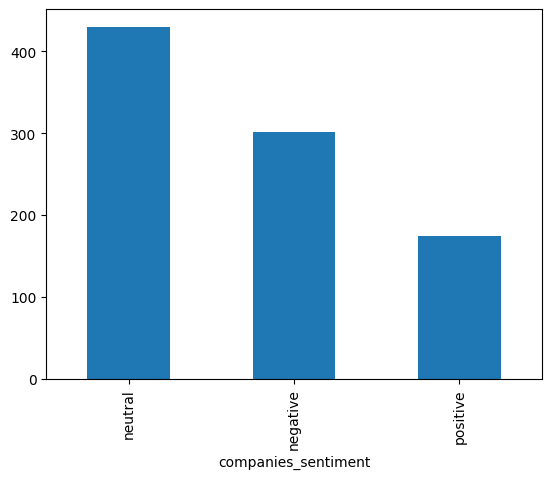

In [46]:
df_train.companies_sentiment.value_counts().plot(kind="bar")

In [47]:
df_train.groupby("companies_sentiment").len.describe()

count       mean        std   min   25%   50%    75%   
companies_sentiment                                                         
negative             301.0  72.269103  18.411699  22.0  61.0  71.0  83.00  \
neutral              430.0  70.395349  18.389644  17.0  59.0  71.5  81.00   
positive             174.0  71.448276  16.873044  22.0  60.0  72.0  82.75   

                       max  
companies_sentiment         
negative             159.0  
neutral              137.0  
positive             120.0

<Axes: title={'center': 'len'}, xlabel='companies_sentiment'>

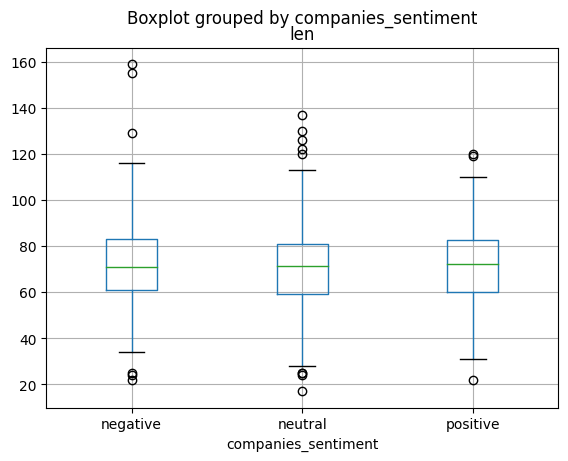

In [48]:
df_train.boxplot(column="len", by="companies_sentiment")

In [14]:
df_train.groupby("companies_sentiment").len.describe()

count       mean        std   min   25%   50%   75%   
companies_sentiment                                                        
negative             301.0  72.269103  18.411699  22.0  61.0  71.0  83.0  \
neutral              430.0  70.395349  18.389644  17.0  59.0  71.5  81.0   
positive             173.0  71.427746  16.919843  22.0  60.0  72.0  83.0   
positive               1.0  75.000000        NaN  75.0  75.0  75.0  75.0   

                       max  
companies_sentiment         
negative             159.0  
neutral              137.0  
positive             120.0  
positive              75.0

<Axes: xlabel='consumers_sentiment'>

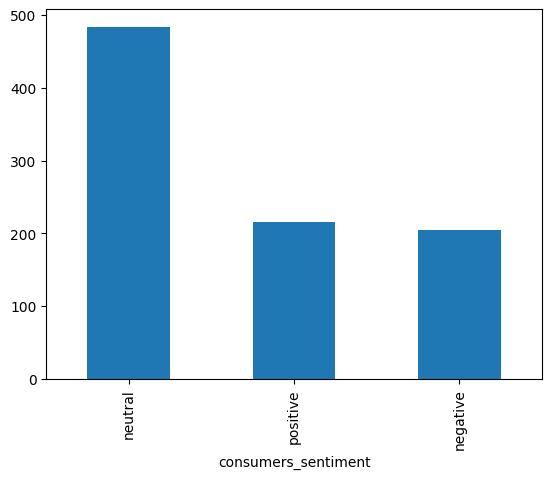

In [49]:
df_train.consumers_sentiment.value_counts().plot(kind="bar")

<Axes: title={'center': 'len'}, xlabel='consumers_sentiment'>

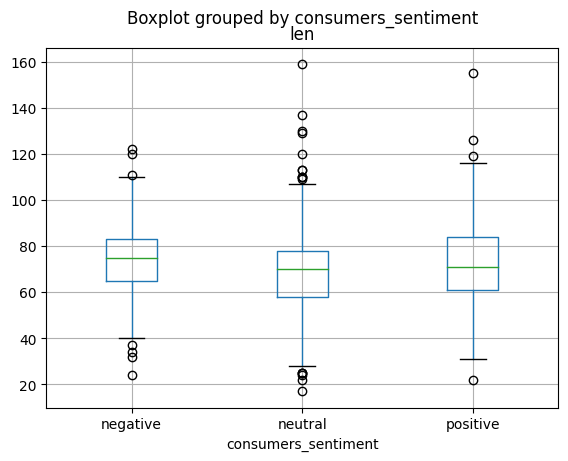

In [50]:
df_train.boxplot(column="len", by="consumers_sentiment")

## World Cloud

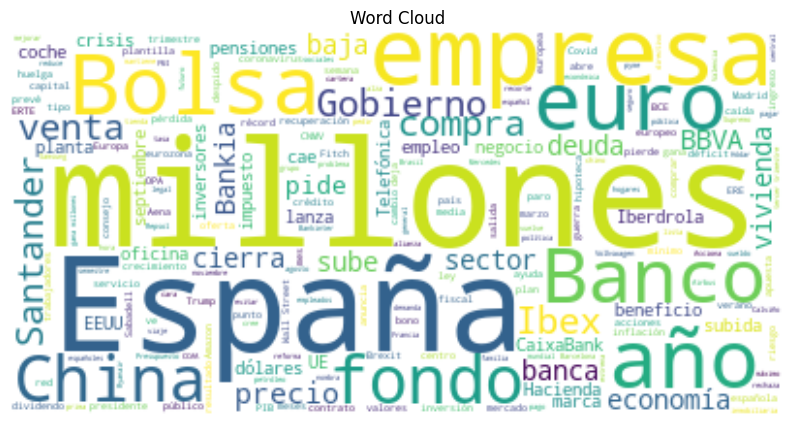

In [51]:
plots_world_cloud(df_train.text, "Word Cloud")

### Target Sentiment

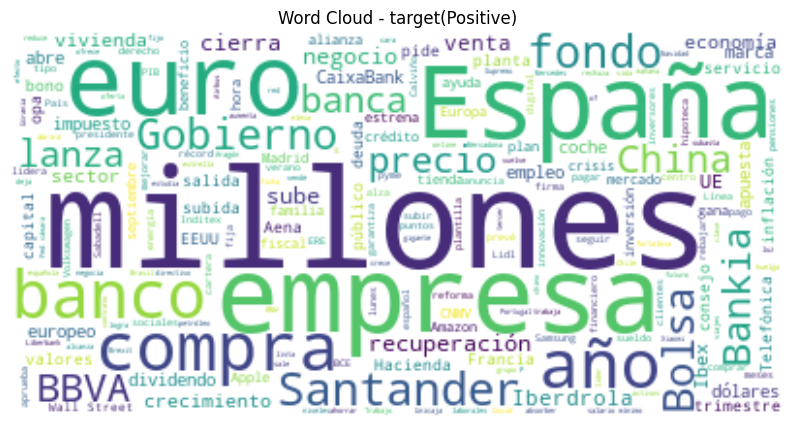

In [52]:
plots_world_cloud(df_train[df_train.target_sentiment == "positive"].text, "Word Cloud - target(Positive)")

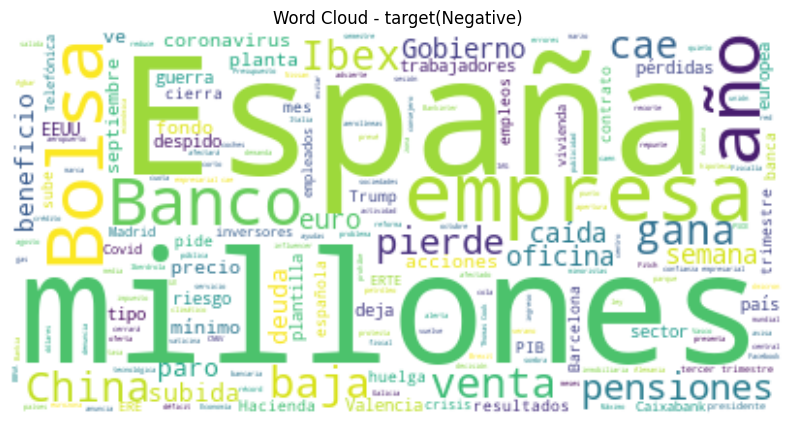

In [19]:
plots_world_cloud(df_train[df_train.target_sentiment == "negative"].text, "Word Cloud - target(Negative)")

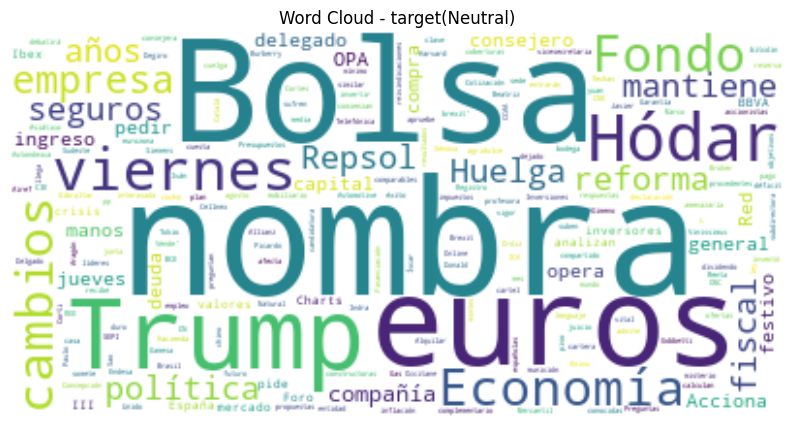

In [20]:
plots_world_cloud(df_train[df_train.target_sentiment == "neutral"].text, "Word Cloud - target(Neutral)")

### Companies Sentiment

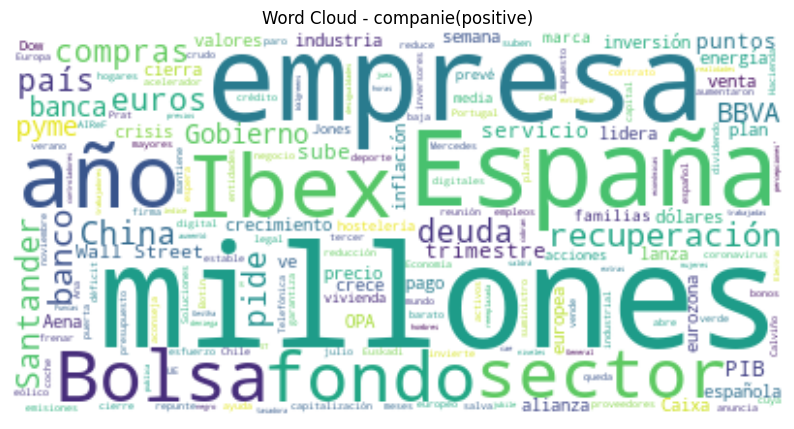

In [21]:
plots_world_cloud(df_train[df_train.companies_sentiment == "positive"].text, "Word Cloud - companie(positive)")

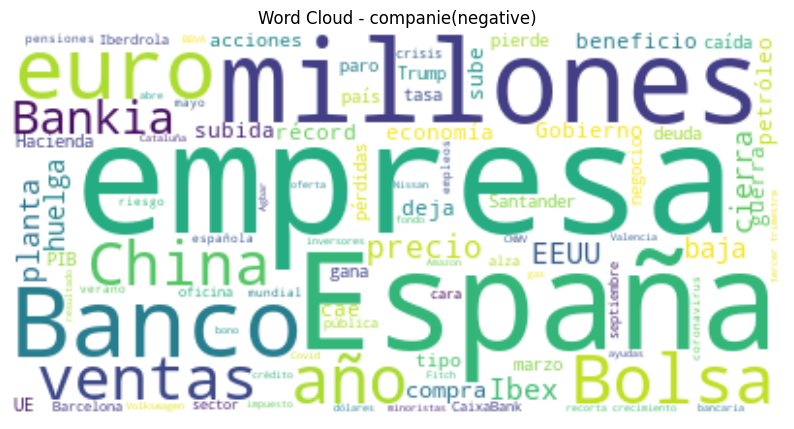

In [22]:
plots_world_cloud(df_train[df_train.companies_sentiment == "negative"].text, "Word Cloud - companie(negative)")

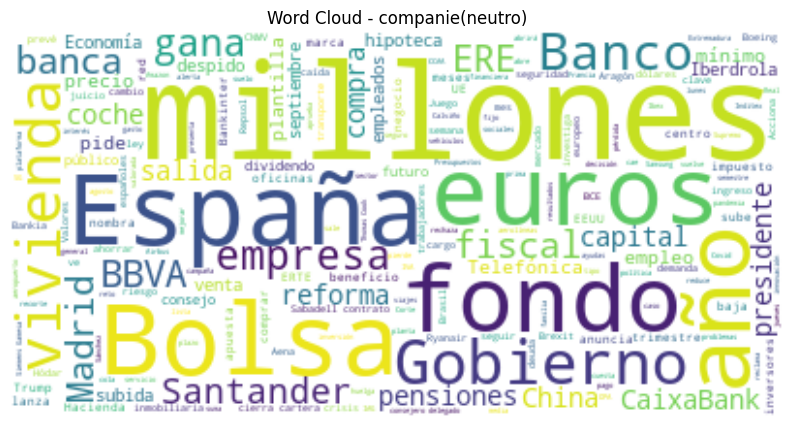

In [23]:
plots_world_cloud(df_train[df_train.companies_sentiment == "neutral"].text, "Word Cloud - companie(neutro)")

### Consumer sentiment

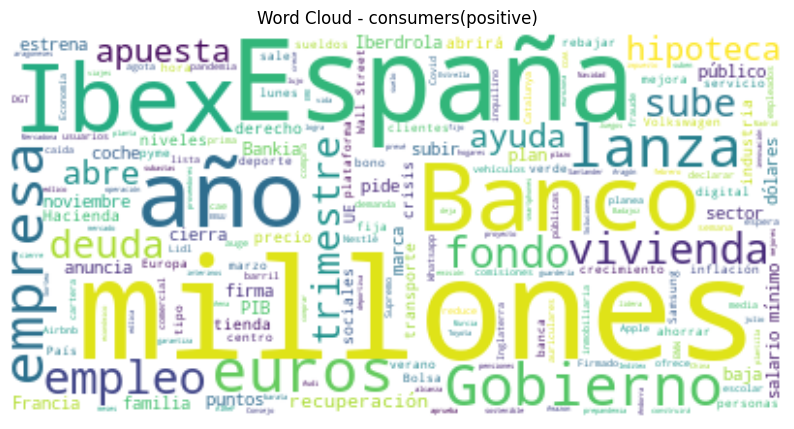

In [24]:
plots_world_cloud(df_train[df_train.consumers_sentiment == "positive"].text, "Word Cloud - consumers(positive)")

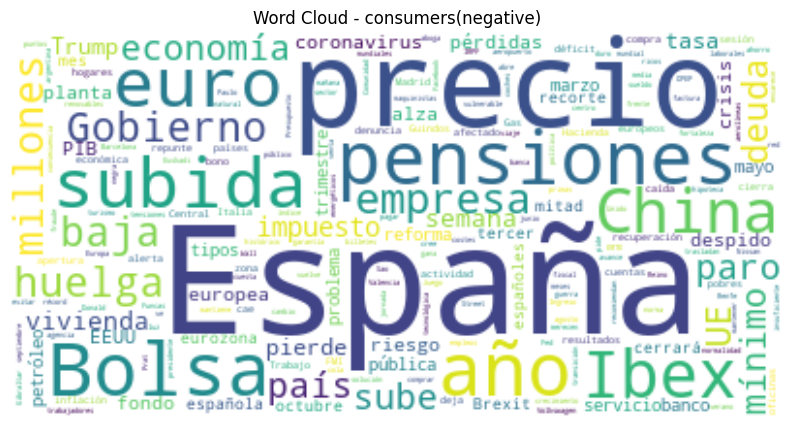

In [25]:
plots_world_cloud(df_train[df_train.consumers_sentiment == "negative"].text, "Word Cloud - consumers(negative)")

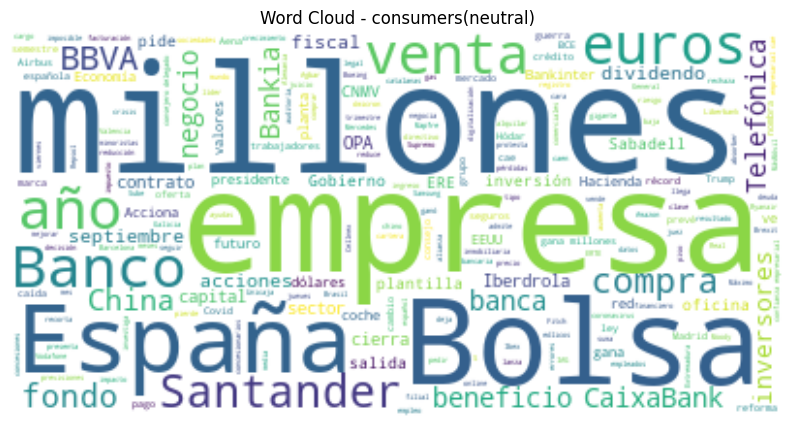

In [26]:
plots_world_cloud(df_train[df_train.consumers_sentiment == "neutral"].text, "Word Cloud - consumers(neutral)")

## Análisis con pysentimiento

In [27]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")
emotion_analyzer = create_analyzer(task="emotion", lang="es")
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [28]:
columns =['sentimient', 'sentimient_probas', 'emotion', 'emotion_prob', 'hateful',
       'targeted', 'aggressive']

In [29]:
def get_values(text):
    global analyzer, emotion_analyzer, hate_speech_analyzer
    sentiment = analyzer.predict(text)
    sentiment_tag = sentiment.output
    sentimient_probas = sentiment.probas[sentiment_tag]
    emotion = emotion_analyzer.predict(text)
    emotion_tag = emotion.output
    emotion_prob = emotion.probas[emotion_tag]
    hate_speech = hate_speech_analyzer.predict(text)
    info = {
        "sentimient": sentiment_tag, 
        "sentimient_probas": sentimient_probas,
        "emotion" : emotion_tag,
        "emotion_prob": emotion_prob,
        **hate_speech.probas}

    return info

In [30]:
df_train[columns] = df_train.text.apply(get_values).apply(pd.Series)
df_train.to_csv("df_with_sentiment.csv", index=False)

In [54]:
df_train.to_csv("df_with_sentiment.csv", index=False)